In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('ipl.csv')

In [3]:
dataset.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
dataset.isnull().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

## here mid is only identification variable . so it is not important for getting prediction

In [5]:
dataset.mid.values

array([  1,   1,   1, ..., 617, 617, 617], dtype=int64)

## so we are dropping this mid column

In [6]:
dataset.drop(['mid'],axis=1,inplace=True)

In [7]:
dataset.head()

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


## so our next variable is date and it is not important for prediction so we can drop this dat var. also

In [8]:
dataset.drop(['date'],axis=1,inplace=True)

In [9]:
dataset.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### so our next var. is venue it is important variable for predict the score
### because total score is very much depends on ground ang its pitch so venue is importtant

In [10]:
dataset['venue'].value_counts()

M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

### here we can replace venue name with its average score
### it will help us to predict the score

In [11]:
dataset['venue'].unique()

array(['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket St

In [12]:
a=['M Chinnaswamy Stadium',
       'Punjab Cricket Association Stadium, Mohali', 'Feroz Shah Kotla',
       'Wankhede Stadium', 'Eden Gardens', 'Sawai Mansingh Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'MA Chidambaram Stadium, Chepauk', 'Dr DY Patil Sports Academy',
       'Newlands', "St George's Park", 'Kingsmead', 'SuperSport Park',
       'Buffalo Park', 'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Holkar Cricket Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'JSCA International Stadium Complex', 'Sheikh Zayed Stadium',
       'Sharjah Cricket Stadium', 'Dubai International Cricket Stadium',
       'Maharashtra Cricket Association Stadium',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Saurashtra Cricket Association Stadium', 'Green Park']

In [13]:
b=[]
for i in a:
    x=dataset[dataset['venue']==i]['total'].mean()
    b.append(round(x))

In [14]:
dic={a[i]:b[i] for i in range(len(a))}

In [15]:
dic

{'M Chinnaswamy Stadium': 170,
 'Punjab Cricket Association Stadium, Mohali': 164,
 'Feroz Shah Kotla': 165,
 'Wankhede Stadium': 165,
 'Eden Gardens': 157,
 'Sawai Mansingh Stadium': 156,
 'Rajiv Gandhi International Stadium, Uppal': 158,
 'MA Chidambaram Stadium, Chepauk': 166,
 'Dr DY Patil Sports Academy': 148,
 'Newlands': 145,
 "St George's Park": 159,
 'Kingsmead': 152,
 'SuperSport Park': 152,
 'Buffalo Park': 147,
 'New Wanderers Stadium': 144,
 'De Beers Diamond Oval': 158,
 'OUTsurance Oval': 135,
 'Brabourne Stadium': 180,
 'Sardar Patel Stadium, Motera': 163,
 'Barabati Stadium': 168,
 'Vidarbha Cricket Association Stadium, Jamtha': 149,
 'Himachal Pradesh Cricket Association Stadium': 176,
 'Nehru Stadium': 151,
 'Holkar Cricket Stadium': 158,
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 160,
 'Subrata Roy Sahara Stadium': 148,
 'Shaheed Veer Narayan Singh International Stadium': 146,
 'JSCA International Stadium Complex': 149,
 'Sheikh Zayed Stadium': 151,
 'S

In [16]:
dataset=dataset.replace(dic)

In [17]:
dataset.head()

,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,170,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,170,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,170,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,170,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,170,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


### our next variables are bat_team and bowl_team 
### these noth are categorical variables and both are nominal type of categorical variables
##### here we have some past team names which are currently not playing and some were not in past matches but noe those teams are playing
##### so we can replace past team with present team and we have to drop some team records 

In [18]:
dataset.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [19]:
dataset.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [20]:
dataset.replace({'Deccan Chargers':'Sunrisers_Hyderabad',
           'Rising Pune Supergiants':'Rajasthan_Royals',
           'Gujarat Lions':'Chennai_Super_Kings',
            'Rising Pune Supergiant':'Rajasthan_Royals',
             'Royal Challengers Bangalore':'Royal_Challengers_Bangalore', 
             'Kings XI Punjab':'Kings_XI_Punjab',
                 'Delhi Daredevils':'Delhi_Daredevils','Kolkata Knight Riders':'Kolkata_Knight_Riders',
                 'Rajasthan Royals':'Rajasthan_Royals','Mumbai Indians':'Mumbai_Indians',
                 'Chennai Super Kings':'Chennai_Super_Kings','Sunrisers Hyderabad':'Sunrisers_Hyderabad'
                 
           },inplace=True)

In [21]:
dataset.bat_team.unique()

array(['Kolkata_Knight_Riders', 'Chennai_Super_Kings', 'Rajasthan_Royals',
       'Mumbai_Indians', 'Sunrisers_Hyderabad', 'Kings_XI_Punjab',
       'Royal_Challengers_Bangalore', 'Delhi_Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [22]:
dataset.bowl_team.unique()

array(['Royal_Challengers_Bangalore', 'Kings_XI_Punjab',
       'Delhi_Daredevils', 'Kolkata_Knight_Riders', 'Rajasthan_Royals',
       'Mumbai_Indians', 'Chennai_Super_Kings', 'Sunrisers_Hyderabad',
       'Pune Warriors', 'Kochi Tuskers Kerala'], dtype=object)

In [23]:
dataset.drop(dataset[dataset['bowl_team']=='Pune Warriors'].index,inplace=True)
dataset.drop(dataset[dataset['bat_team']=='Pune Warriors'].index,inplace=True)
dataset.drop(dataset[dataset['bowl_team']=='Kochi Tuskers Kerala'].index,inplace=True)
dataset.drop(dataset[dataset['bat_team']=='Kochi Tuskers Kerala'].index,inplace=True)

In [24]:
dataset.bat_team.unique()

array(['Kolkata_Knight_Riders', 'Chennai_Super_Kings', 'Rajasthan_Royals',
       'Mumbai_Indians', 'Sunrisers_Hyderabad', 'Kings_XI_Punjab',
       'Royal_Challengers_Bangalore', 'Delhi_Daredevils'], dtype=object)

In [25]:
dataset.bowl_team.unique()

array(['Royal_Challengers_Bangalore', 'Kings_XI_Punjab',
       'Delhi_Daredevils', 'Kolkata_Knight_Riders', 'Rajasthan_Royals',
       'Mumbai_Indians', 'Chennai_Super_Kings', 'Sunrisers_Hyderabad'],
      dtype=object)

In [26]:
dataset.shape

(68994, 13)

#### now no of bat_team and no of bowl_team are same 
#### all team a playing in present matches
#### no we can apply onehot encoading on these teams

In [27]:
bat_team=dataset[['bat_team']]
bat_team=pd.get_dummies(bat_team,drop_first=True)
bat_team.head()

,bat_team_Delhi_Daredevils,bat_team_Kings_XI_Punjab,bat_team_Kolkata_Knight_Riders,bat_team_Mumbai_Indians,bat_team_Rajasthan_Royals,bat_team_Royal_Challengers_Bangalore,bat_team_Sunrisers_Hyderabad
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [28]:
bowl_team=dataset[['bowl_team']]
bowl_team=pd.get_dummies(bowl_team,drop_first=True)
bowl_team.head()

,bowl_team_Delhi_Daredevils,bowl_team_Kings_XI_Punjab,bowl_team_Kolkata_Knight_Riders,bowl_team_Mumbai_Indians,bowl_team_Rajasthan_Royals,bowl_team_Royal_Challengers_Bangalore,bowl_team_Sunrisers_Hyderabad
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


### now we can drop bat_team and bowl_team variables because we dummys of those variables

In [29]:
dataset.drop(['bat_team','bowl_team'],axis=1,inplace=True)

### we can concat those dummys with our datset

In [30]:
dataset=pd.concat([dataset,bowl_team,bat_team],axis=1)

In [31]:
dataset.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,...,bowl_team_Rajasthan_Royals,bowl_team_Royal_Challengers_Bangalore,bowl_team_Sunrisers_Hyderabad,bat_team_Delhi_Daredevils,bat_team_Kings_XI_Punjab,bat_team_Kolkata_Knight_Riders,bat_team_Mumbai_Indians,bat_team_Rajasthan_Royals,bat_team_Royal_Challengers_Bangalore,bat_team_Sunrisers_Hyderabad
0,170,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,170,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,170,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,170,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,170,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### now we have to drop first 5 overs data from all the matches 
### because after some overs we can pedict the score. so i am droping first five overs data

In [32]:
dataset.drop(dataset[dataset['overs']<=5].index,inplace=True)

In [33]:
dataset.head()

,venue,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,...,bowl_team_Rajasthan_Royals,bowl_team_Royal_Challengers_Bangalore,bowl_team_Sunrisers_Hyderabad,bat_team_Delhi_Daredevils,bat_team_Kings_XI_Punjab,bat_team_Kolkata_Knight_Riders,bat_team_Mumbai_Indians,bat_team_Rajasthan_Royals,bat_team_Royal_Challengers_Bangalore,bat_team_Sunrisers_Hyderabad
32,170,BB McCullum,Z Khan,61,0,5.1,59,0,41,10,...,0,1,0,0,0,1,0,0,0,0
33,170,SC Ganguly,Z Khan,61,1,5.2,59,1,41,10,...,0,1,0,0,0,1,0,0,0,0
34,170,RT Ponting,Z Khan,61,1,5.3,59,1,41,0,...,0,1,0,0,0,1,0,0,0,0
35,170,RT Ponting,Z Khan,61,1,5.4,59,1,41,0,...,0,1,0,0,0,1,0,0,0,0
36,170,RT Ponting,Z Khan,61,1,5.5,58,1,41,0,...,0,1,0,0,0,1,0,0,0,0


#### here batsman and bowler variable are not important 
#### because we can know that name of batsman from wicket variable 
#### and we can find the bowler name from overs variable
#### so we can drop these variables

In [34]:
dataset.drop(['batsman','bowler'],axis=1,inplace=True)

In [35]:
dataset.head()

,venue,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total,bowl_team_Delhi_Daredevils,...,bowl_team_Rajasthan_Royals,bowl_team_Royal_Challengers_Bangalore,bowl_team_Sunrisers_Hyderabad,bat_team_Delhi_Daredevils,bat_team_Kings_XI_Punjab,bat_team_Kolkata_Knight_Riders,bat_team_Mumbai_Indians,bat_team_Rajasthan_Royals,bat_team_Royal_Challengers_Bangalore,bat_team_Sunrisers_Hyderabad
32,170,61,0,5.1,59,0,41,10,222,0,...,0,1,0,0,0,1,0,0,0,0
33,170,61,1,5.2,59,1,41,10,222,0,...,0,1,0,0,0,1,0,0,0,0
34,170,61,1,5.3,59,1,41,0,222,0,...,0,1,0,0,0,1,0,0,0,0
35,170,61,1,5.4,59,1,41,0,222,0,...,0,1,0,0,0,1,0,0,0,0
36,170,61,1,5.5,58,1,41,0,222,0,...,0,1,0,0,0,1,0,0,0,0


### here striker and non-striker variables are not important for prediction the score
### so we can drop these variables

In [36]:
dataset.drop(['striker','non-striker'],axis=1,inplace=True)

In [37]:
dataset.head()

,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bowl_team_Delhi_Daredevils,bowl_team_Kings_XI_Punjab,bowl_team_Kolkata_Knight_Riders,...,bowl_team_Rajasthan_Royals,bowl_team_Royal_Challengers_Bangalore,bowl_team_Sunrisers_Hyderabad,bat_team_Delhi_Daredevils,bat_team_Kings_XI_Punjab,bat_team_Kolkata_Knight_Riders,bat_team_Mumbai_Indians,bat_team_Rajasthan_Royals,bat_team_Royal_Challengers_Bangalore,bat_team_Sunrisers_Hyderabad
32,170,61,0,5.1,59,0,222,0,0,0,...,0,1,0,0,0,1,0,0,0,0
33,170,61,1,5.2,59,1,222,0,0,0,...,0,1,0,0,0,1,0,0,0,0
34,170,61,1,5.3,59,1,222,0,0,0,...,0,1,0,0,0,1,0,0,0,0
35,170,61,1,5.4,59,1,222,0,0,0,...,0,1,0,0,0,1,0,0,0,0
36,170,61,1,5.5,58,1,222,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# all the preprocessing steps is completed we can go for model bulding

### first converting data into independent and dependent feature(x&y)

In [38]:
x=dataset.drop(['total'],axis=1)
y=dataset['total']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [41]:
x_train.shape

(35998, 20)

In [42]:
y_train.shape

(35998,)

### creating a linear regression model

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [45]:
from sklearn import metrics

In [46]:
LR_pred=LR.predict(x_test)

In [47]:
metrics.r2_score(y_test,LR_pred)

0.6598992522651963

In [48]:
LR.score(x_train,y_train)

0.6501638908000853

In [49]:
LR.score(x_test,y_test)

0.6598992522651963

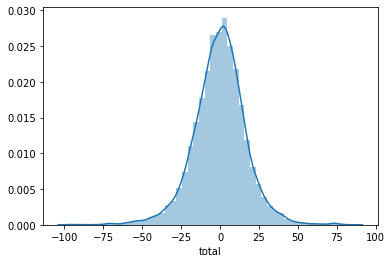

In [50]:
sns.distplot(y_test-LR_pred)
plt.show()

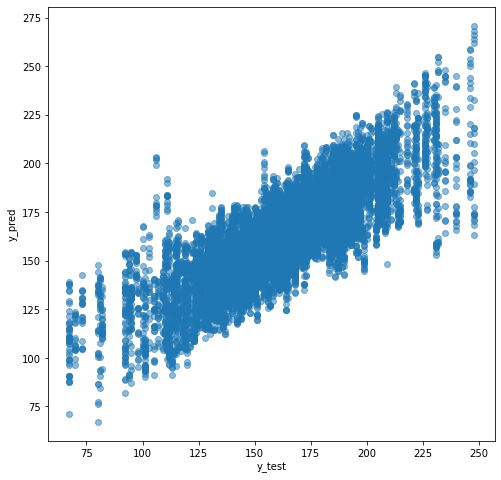

In [51]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, LR_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [52]:
print('MAE:', metrics.mean_absolute_error(y_test, LR_pred))
print('MSE:', metrics.mean_squared_error(y_test, LR_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, LR_pred)))

MAE: 12.582211265051004
MSE: 282.56557184602275
RMSE: 16.809686845566837


### now we can try Lasso regrssor

In [53]:
from sklearn.linear_model import Lasso

In [54]:
La=Lasso()
La.fit(x_train,y_train)

Lasso()

In [55]:
La_pred=La.predict(x_test)

In [56]:
metrics.r2_score(y_test,La_pred)

0.652474434772868

In [57]:
La.score(x_train,y_train)

0.6378945369802819

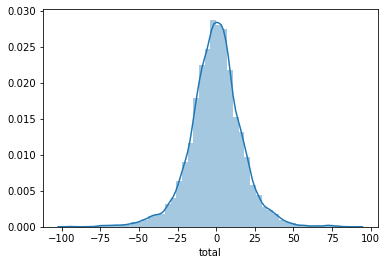

In [58]:
sns.distplot(y_test-La_pred)
plt.show()

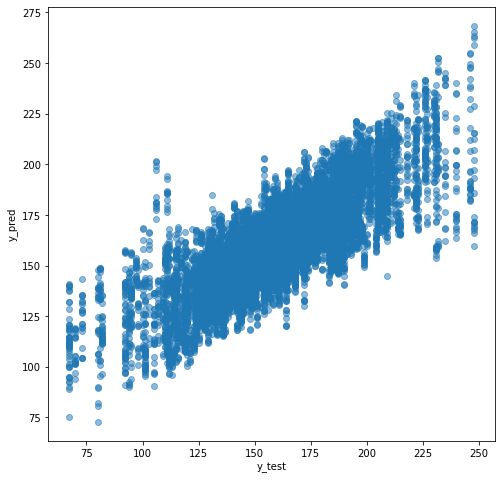

In [59]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, La_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, La_pred))
print('MSE:', metrics.mean_squared_error(y_test, La_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, La_pred)))

MAE: 12.572359944860716
MSE: 288.7343257065936
RMSE: 16.99218425355003


### now we can try Ridge regressor

In [61]:
from sklearn.linear_model import Ridge

In [62]:
RI=Ridge()
RI.fit(x_train,y_train)

Ridge()

In [63]:
RI_pred=RI.predict(x_test)

In [64]:
metrics.r2_score(y_test,RI_pred)

0.6598999905160268

In [65]:
RI.score(x_train,y_train)

0.6501638902671644

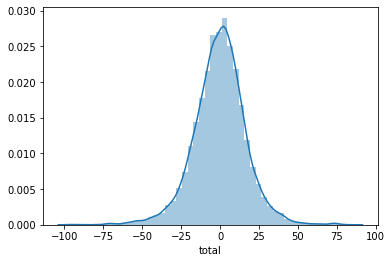

In [66]:
sns.distplot(y_test-RI_pred)
plt.show()

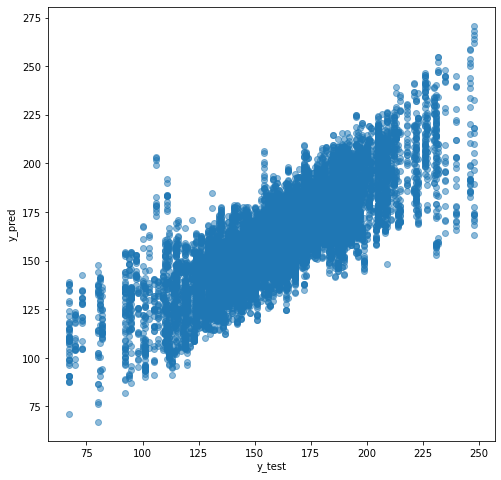

In [67]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, RI_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, RI_pred))
print('MSE:', metrics.mean_squared_error(y_test, RI_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RI_pred)))

MAE: 12.582156863630011
MSE: 282.56495848580676
RMSE: 16.8096686013082


### we can try Random Forest Regressor

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)

RandomForestRegressor()

In [71]:
RF_pred=RF.predict(x_test)

In [72]:
metrics.r2_score(y_test,RF_pred)

0.9462261534381405

In [73]:
RF.score(x_train,y_train)

0.9921761187356738

In [74]:
RF.score(x_test,y_test)

0.9462261534381405

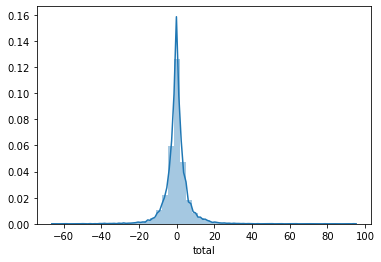

In [75]:
sns.distplot(y_test-RF_pred)
plt.show()

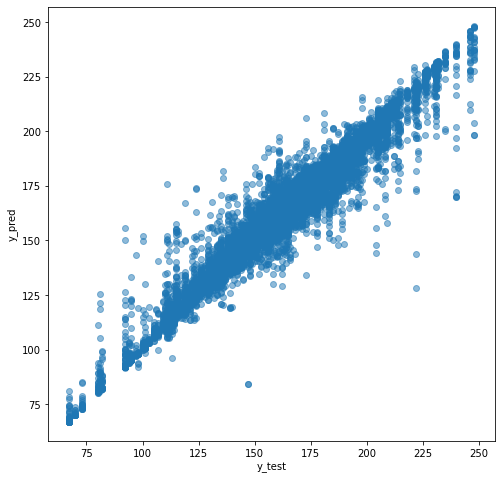

In [76]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, RF_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, RF_pred))
print('MSE:', metrics.mean_squared_error(y_test, RF_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, RF_pred)))

MAE: 3.916997558709789
MSE: 44.676872383592226
RMSE: 6.684076030656161


# from all of these models Random Forest is givig us very good prediction so we have to use Random Forest 

### save the model to reuse again

In [78]:
import pickle
# open a file, where you ant to store the data
file = open('score_RF.pkl', 'wb')

# dump information to that file
pickle.dump(RF, file)
file.close()

In [79]:
model = open('score_RF.pkl','rb')
forest = pickle.load(model)

In [80]:
y_pred=forest.predict(x_test)

In [81]:
metrics.r2_score(y_test,y_pred)

0.9462261534381405